In [1]:
import json 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,classification_report, confusion_matrix
import xgboost as xgb


In [2]:
df = pd.read_json('transactionsjson.json',lines=True)

In [3]:
df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [4]:
#Select Relevant Columns  
df_model = df[['creditLimit','availableMoney','transactionAmount','transactionType','currentBalance',
               'posEntryMode','cardPresent','recurringAuthInd','expirationDateKeyInMatch','isFraud',
               'acqCountry','merchantCountryCode','posConditionCode']]

In [5]:
#get dummies
df_dum = pd.get_dummies(df_model,drop_first=True)

In [6]:
df_dum.head()

,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL,...,acqCountry_MEX,acqCountry_PR,acqCountry_US,merchantCountryCode_CAN,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US,posConditionCode_01,posConditionCode_08,posConditionCode_99
0,5000,5000.0,98.55,0.0,False,False,False,0,1,0,...,0,0,1,0,0,0,1,1,0,0
1,5000,5000.0,74.51,0.0,True,False,False,0,1,0,...,0,0,1,0,0,0,1,1,0,0
2,5000,5000.0,7.47,0.0,False,False,False,0,1,0,...,0,0,1,0,0,0,1,1,0,0
3,5000,5000.0,7.47,0.0,False,False,False,0,1,0,...,0,0,1,0,0,0,1,1,0,0
4,5000,5000.0,71.18,0.0,True,False,False,0,1,0,...,0,0,1,0,0,0,1,1,0,0


In [7]:
df_dum.replace(True,1)
df_dum.replace(False,0)

,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL,...,acqCountry_MEX,acqCountry_PR,acqCountry_US,merchantCountryCode_CAN,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US,posConditionCode_01,posConditionCode_08,posConditionCode_99
0,5000,5000.00,98.55,0.00,0.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
1,5000,5000.00,74.51,0.00,1.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
2,5000,5000.00,7.47,0.00,0.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
3,5000,5000.00,7.47,0.00,0.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
4,5000,5000.00,71.18,0.00,1.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,50000,48904.96,119.92,1095.04,0.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
786359,50000,48785.04,18.89,1214.96,0.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
786360,50000,48766.15,49.43,1233.85,0.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
786361,50000,48716.72,49.89,1283.28,0.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,1,0,0,1


In [8]:
df_dum.columns

Index(['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance',
       'cardPresent', 'expirationDateKeyInMatch', 'isFraud',
       'transactionType_ADDRESS_VERIFICATION', 'transactionType_PURCHASE',
       'transactionType_REVERSAL', 'posEntryMode_02', 'posEntryMode_05',
       'posEntryMode_09', 'posEntryMode_80', 'posEntryMode_90',
       'acqCountry_CAN', 'acqCountry_MEX', 'acqCountry_PR', 'acqCountry_US',
       'merchantCountryCode_CAN', 'merchantCountryCode_MEX',
       'merchantCountryCode_PR', 'merchantCountryCode_US',
       'posConditionCode_01', 'posConditionCode_08', 'posConditionCode_99'],
      dtype='object')

In [9]:
set(df_dum.columns)

{'acqCountry_CAN',
 'acqCountry_MEX',
 'acqCountry_PR',
 'acqCountry_US',
 'availableMoney',
 'cardPresent',
 'creditLimit',
 'currentBalance',
 'expirationDateKeyInMatch',
 'isFraud',
 'merchantCountryCode_CAN',
 'merchantCountryCode_MEX',
 'merchantCountryCode_PR',
 'merchantCountryCode_US',
 'posConditionCode_01',
 'posConditionCode_08',
 'posConditionCode_99',
 'posEntryMode_02',
 'posEntryMode_05',
 'posEntryMode_09',
 'posEntryMode_80',
 'posEntryMode_90',
 'transactionAmount',
 'transactionType_ADDRESS_VERIFICATION',
 'transactionType_PURCHASE',
 'transactionType_REVERSAL'}

In [10]:
len(df_dum.columns)

26

In [11]:
len(set(df_dum.columns))

26

In [12]:
#split data 

X = df_dum.drop('isFraud', axis=1)
y = df_dum.isFraud


In [13]:
#Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75, random_state=123,)

Lets try a few different tree and ensemble classifiers to see how they do.  We will run them with and without balancing for  Typically we will use a combination of different models

In [14]:
import itertools

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

from imblearn.datasets import fetch_datasets
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier

from imblearn.metrics import geometric_mean_score


def plot_confusion_matrix(cm, classes, ax,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print(cm)
    print('')

    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.sca(ax)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

Decision tree classifier performance:
Balanced accuracy: 0.51 - ROC/AUC 0.51
[[571064   9388]
 [  8952    369]]



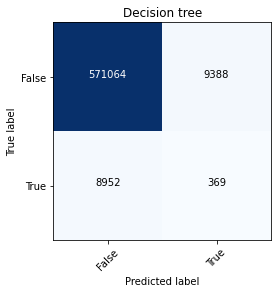

In [15]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print('Decision tree classifier performance:')
print('Balanced accuracy: {:.2f} - ROC/AUC {:.2f}'
      .format(balanced_accuracy_score(y_test, y_pred_tree),
              roc_auc_score(y_test, y_pred_tree)))
cm_tree = confusion_matrix(y_test, y_pred_tree)
fig, ax = plt.subplots()
plot_confusion_matrix(cm_tree, classes=np.unique(y), ax=ax,
                      title='Decision tree')

In [16]:
bagging = BaggingClassifier(n_estimators=50, random_state=0, n_jobs=-1)
balanced_bagging = BalancedBaggingClassifier(n_estimators=50, random_state=0,
                                             n_jobs=-1)

bagging.fit(X_train, y_train)
balanced_bagging.fit(X_train, y_train)

y_pred_bc = bagging.predict(X_test)
y_pred_bbc = balanced_bagging.predict(X_test)

Bagging classifier performance:
Balanced accuracy: 0.50 - ROC/AUC 0.50
[[580239    213]
 [  9301     20]]

Balanced Bagging classifier performance:
Balanced accuracy: 0.64 - ROC/AUC 0.64
[[465668 114784]
 [  4791   4530]]



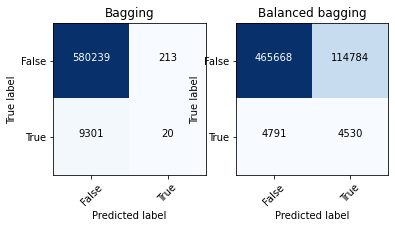

In [17]:
print('Bagging classifier performance:')
print('Balanced accuracy: {:.2f} - ROC/AUC {:.2f}'
      .format(balanced_accuracy_score(y_test, y_pred_bc),
              roc_auc_score(y_test, y_pred_bc)))
cm_bagging = confusion_matrix(y_test, y_pred_bc)
fig, ax = plt.subplots(ncols=2)
plot_confusion_matrix(cm_bagging, classes=np.unique(y), ax=ax[0],
                      title='Bagging')

print('Balanced Bagging classifier performance:')
print('Balanced accuracy: {:.2f} - ROC/AUC {:.2f}'
      .format(balanced_accuracy_score(y_test, y_pred_bbc),
              roc_auc_score(y_test, y_pred_bbc)))
cm_balanced_bagging = confusion_matrix(y_test, y_pred_bbc)
plot_confusion_matrix(cm_balanced_bagging, classes=np.unique(y),
                      ax=ax[1], title='Balanced bagging')

Random Forest classifier performance:
Balanced accuracy: 0.50 - ROC/AUC 0.50
[[580040    412]
 [  9287     34]]

Balanced Random Forest classifier performance:
Balanced accuracy: 0.66 - Geometric mean 0.66
[[391245 189207]
 [  3329   5992]]



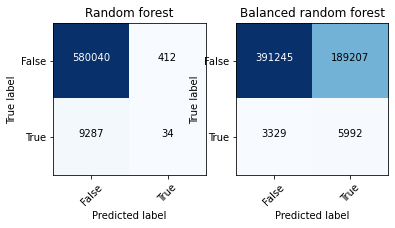

In [18]:
rf = RandomForestClassifier(n_estimators=50, random_state=0, n_jobs=-1)
brf = BalancedRandomForestClassifier(n_estimators=50, random_state=0,
                                     n_jobs=-1)

rf.fit(X_train, y_train)
brf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_brf = brf.predict(X_test)

# Similarly to the previous experiment, the balanced classifier outperform the
# classifier which learn from imbalanced bootstrap samples. In addition, random
# forest outsperforms the bagging classifier.

print('Random Forest classifier performance:')
print('Balanced accuracy: {:.2f} - ROC/AUC {:.2f}'
      .format(balanced_accuracy_score(y_test, y_pred_rf),
             roc_auc_score(y_test, y_pred_rf)))
cm_rf = confusion_matrix(y_test, y_pred_rf)
fig, ax = plt.subplots(ncols=2)
plot_confusion_matrix(cm_rf, classes=np.unique(y), ax=ax[0],
                      title='Random forest')

print('Balanced Random Forest classifier performance:')
print('Balanced accuracy: {:.2f} - Geometric mean {:.2f}'
      .format(balanced_accuracy_score(y_test, y_pred_brf),
              roc_auc_score(y_test, y_pred_brf)))
cm_brf = confusion_matrix(y_test, y_pred_brf)
plot_confusion_matrix(cm_brf, classes=np.unique(y), ax=ax[1],
                      title='Balanced random forest')

Easy ensemble classifier performance:
Balanced accuracy: 0.67 - ROC/AUC 0.67
[[371924 208528]
 [  2755   6566]]

RUSBoost classifier performance:
Balanced accuracy: 0.68 - ROC/AUC 0.68
[[378446 202006]
 [  2799   6522]]



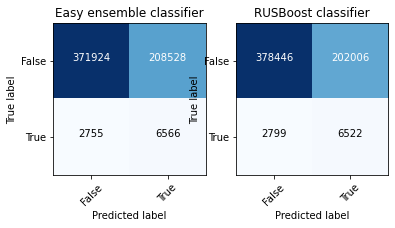

In [19]:
base_estimator = AdaBoostClassifier(n_estimators=10)
eec = EasyEnsembleClassifier(n_estimators=10,
                             base_estimator=base_estimator,
                             n_jobs=-1)
eec.fit(X_train, y_train)
y_pred_eec = eec.predict(X_test)
print('Easy ensemble classifier performance:')
print('Balanced accuracy: {:.2f} - ROC/AUC {:.2f}'
      .format(balanced_accuracy_score(y_test, y_pred_eec),
              roc_auc_score(y_test, y_pred_eec)))
cm_eec = confusion_matrix(y_test, y_pred_eec)
fig, ax = plt.subplots(ncols=2)
plot_confusion_matrix(cm_eec, classes=np.unique(y), ax=ax[0],
                      title='Easy ensemble classifier')

rusboost = RUSBoostClassifier(n_estimators=10,
                              base_estimator=base_estimator)
rusboost.fit(X_train, y_train)
y_pred_rusboost = rusboost.predict(X_test)
print('RUSBoost classifier performance:')
print('Balanced accuracy: {:.2f} - ROC/AUC {:.2f}'
      .format(balanced_accuracy_score(y_test, y_pred_rusboost),
              roc_auc_score(y_test, y_pred_rusboost)))
cm_rusboost = confusion_matrix(y_test, y_pred_rusboost)
plot_confusion_matrix(cm_rusboost, classes=np.unique(y),
                      ax=ax[1], title='RUSBoost classifier')

plt.show()

We are using AUC/ROC in order to score our model.  Accuracy is not as useful for these imbalanced fraud datasets.

these models are ranging from .50-.68 ROC which is alright but not amazing.


Modern Techniques include using models like XGBoost which has been shown to outperform almost every other model.

https://ieeexplore.ieee.org/abstract/document/9214206

https://www.e3s-conferences.org/articles/e3sconf/abs/2020/74/e3sconf_ebldm2020_02042/e3sconf_ebldm2020_02042.html




Lets run XGBClassifier  start with some values to get a baseline.  Then get feature importance. Then tune Hyperparameters.



In [21]:
xgbcl = xgb.XGBClassifier(objective='binary:logistic',
                         tree_method='gpu_hist',
                      n_jobs = -1,random_state=123)

# Fit the classifier to the training set
xgbcl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='gpu_hist', validate_parameters=1,
              verbosity=None)

In [37]:
# Predict the labels of the test set: preds
y_pred = xgbcl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))





accuracy: 0.984160


In [38]:
#print confusion matrix, classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[580424     28]
 [  9314      7]]
              precision    recall  f1-score   support

       False       0.98      1.00      0.99    580452
        True       0.20      0.00      0.00      9321

    accuracy                           0.98    589773
   macro avg       0.59      0.50      0.50    589773
weighted avg       0.97      0.98      0.98    589773



In [24]:
#get area under curve (AUC) 
dmatrix = xgb.DMatrix(data=X, label=y)
params = {"objective":"binary:logistic",
         'tree_method':'gpu_hist',
                         'n_jobs':-1}
#Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=dmatrix, params=params, 
                    nfold=10, num_boost_round=10, 
                    metrics="auc", as_pandas=True, seed=123,)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])


   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.718580       0.005469       0.717199      0.007960
1        0.730219       0.002662       0.726934      0.008008
2        0.733076       0.001862       0.729231      0.006477
3        0.735265       0.001461       0.731955      0.004387
4        0.736865       0.000939       0.733383      0.004755
5        0.737928       0.000686       0.733999      0.005266
6        0.739243       0.000843       0.734293      0.005492
7        0.740862       0.000750       0.734764      0.005259
8        0.742556       0.000597       0.735202      0.005318
9        0.743936       0.000718       0.735746      0.005357
0.7357459


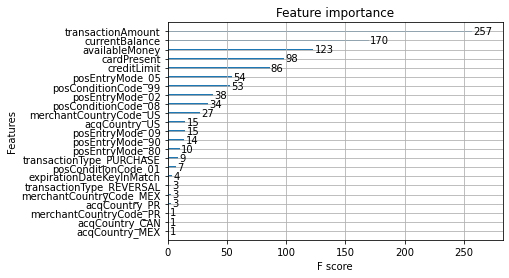

In [25]:
#What are the most important features in the dataset relating to fraud.  
dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"binary:logistic",
         'tree_method':'gpu_hist',
                         'n_jobs':-1}

# Train the model: 
xg_reg = xgb.train(params=params, dtrain=dmatrix, num_boost_round=20)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

It appears transactionAmount and currentBalance is a very significant factor for determining fraud in this dataset.

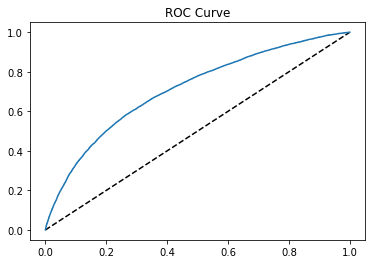

In [36]:
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
# Compute predicted probabilities: y_pred_prob
y_pred_prob = xgbcl.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.show()

In [27]:
#Measure Accuracy 

# Create the parameter dictionary: params
params = {"objective":"binary:logistic",
         'tree_method':'gpu_hist',
                         'n_jobs':-1}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=dmatrix, params=params, 
                  nfold=3, num_boost_round=5, 
                  metrics="error", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))



   train-error-mean  train-error-std  test-error-mean  test-error-std
0           0.01579         0.000059          0.01579        0.000118
1           0.01579         0.000059          0.01579        0.000118
2           0.01579         0.000059          0.01579        0.000118
3           0.01579         0.000059          0.01579        0.000118
4           0.01579         0.000059          0.01579        0.000118
0.98421


This doesn't tell us much

In [29]:
#tune some hyperparameters.

param_grid = {
    
    'max_depth':range(3,10,1),
 'min_child_weight':range(1,6,1)
    
}
xgb1 = xgb.XGBClassifier(objective="binary:logistic",
                         tree_method='gpu_hist',
                        n_jobs = -1)

xgb1_cv = RandomizedSearchCV(estimator=xgb1,
                             param_distributions=param_grid,
                             cv=3,
                             scoring='roc_auc',
                             verbose=1,random_state=123,n_jobs=-1)

xgb1_cv.fit(X_train, y_train)

print(xgb1_cv.best_params_)
print(xgb1_cv.best_score_)
print(xgb1_cv.scorer_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   30.5s finished


{'min_child_weight': 4, 'max_depth': 4}
0.7244526436250291
make_scorer(roc_auc_score, needs_threshold=True)


In [30]:
#tune gamma 

param_grid = {
    
   'gamma':[i/10.0 for i in range(0,5)]
    
}
xgb2 = xgb.XGBClassifier(objective="binary:logistic",max_depth=4,
                         min_child_weight=1,
                         tree_method='gpu_hist',n_jobs=-1)

xgb2_cv = RandomizedSearchCV(estimator=xgb2,
                             param_distributions=param_grid,
                             scoring='roc_auc',
                             verbose=1,random_state=123,n_jobs=-1)

xgb2_cv.fit(X_train, y_train)

print(xgb2_cv.best_params_)
print(xgb2_cv.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   12.2s finished


{'gamma': 0.4}
0.7305858374823007


In [31]:
#Test AUC with new optimized parameters

params = {
    "objective": "binary:logistic",
    "max_depth": 4,
    'min_child_weight': 1,
    'gamma': .4,
    'tree_method': 'gpu_hist',
    'n_jobs':-1
}
#Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=dmatrix,
                    params=params,
                    nfold=5,
                    num_boost_round=20,
                    metrics="auc",
                    as_pandas=True,
                    seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

    train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0         0.711783       0.001592       0.710731      0.003505
1         0.724598       0.002766       0.723307      0.003699
2         0.728424       0.001012       0.726780      0.002156
3         0.729534       0.000621       0.727336      0.002523
4         0.730829       0.000750       0.729158      0.001920
5         0.731245       0.000556       0.729726      0.002076
6         0.731701       0.000385       0.730045      0.002211
7         0.732536       0.000568       0.730303      0.002380
8         0.733083       0.000652       0.730710      0.002063
9         0.734193       0.000588       0.731335      0.002047
10        0.735131       0.000526       0.732209      0.001450
11        0.735766       0.000520       0.732290      0.001212
12        0.736149       0.000630       0.732719      0.001407
13        0.736960       0.000552       0.733351      0.001439
14        0.737884       0.000591       0.733942      0

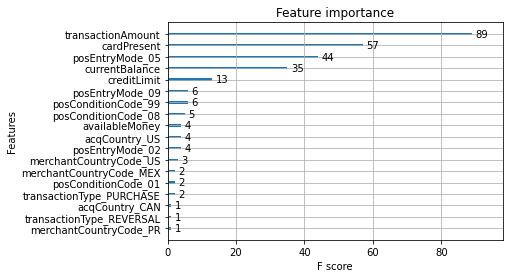

In [32]:
xg_reg1 = xgb.train(params=params, dtrain=dmatrix, num_boost_round=20,)

# Plot the feature importances
xgb.plot_importance(xg_reg1)
plt.show()

In [33]:
params = {
    "objective": 'binary:logistic',
    "max_depth": 4,
    'min_child_weight': 1,
    'gamma': .4,
    'tree_method': 'gpu_hist','n_jobs':-1
}
#Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=dmatrix,
                    params=params,
                    nfold=5,
                    num_boost_round=20,
                    metrics="auc",
                    as_pandas=True,
                    seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

    train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0         0.711783       0.001592       0.710731      0.003505
1         0.724598       0.002766       0.723307      0.003699
2         0.728424       0.001012       0.726780      0.002156
3         0.729534       0.000621       0.727336      0.002523
4         0.730829       0.000750       0.729158      0.001920
5         0.731245       0.000556       0.729726      0.002076
6         0.731701       0.000385       0.730045      0.002211
7         0.732536       0.000568       0.730303      0.002380
8         0.733083       0.000652       0.730710      0.002063
9         0.734193       0.000588       0.731335      0.002047
10        0.735131       0.000526       0.732209      0.001450
11        0.735766       0.000520       0.732290      0.001212
12        0.736149       0.000630       0.732719      0.001407
13        0.736960       0.000552       0.733351      0.001439
14        0.737884       0.000591       0.733942      0

In [34]:



xgb3 = xgb.XGBClassifier(objective="binary:logistic",
                         max_depth=4,
                         min_child_weight=1,
                         gamma=.4,
                         tree_method='gpu_hist',
                        n_jobs = -1)


xgb3.fit(X_train, y_train)



y_pred3 = xgb3.predict(X_test)
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))


[[580445      7]
 [  9317      4]]
              precision    recall  f1-score   support

       False       0.98      1.00      0.99    580452
        True       0.36      0.00      0.00      9321

    accuracy                           0.98    589773
   macro avg       0.67      0.50      0.50    589773
weighted avg       0.97      0.98      0.98    589773



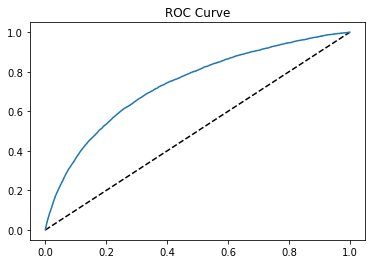

In [35]:
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
# Compute predicted probabilities: y_pred_prob
y_pred_prob = xgb3.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.show()

After all that optimization we are still getting roughly the same results!